<a href="https://colab.research.google.com/github/LaDiosaNegra/Kristal_Main/blob/main/KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classification

### Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [ ]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [ ]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
x.describe()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,0.031425,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.163383,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,0.174562,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.434531,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<img src="Image 1.png"  style="width:600px;" align="center">

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

### Implementing KNN Classifier

In [ ]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 13)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.703030303030303


### Elbow for Classifier

In [ ]:
def Elbow(K):
    #initiating empty list
    test_error = []

    #training model for evey value of K
    for i in range(6, 20, 2):
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)

    return test_error

In [ ]:
# calling above defined function
test = Elbow(k)
test

[0.33333333333333326,
 0.2993630573248408,
 0.29999999999999993,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

Text(0.5, 1.0, 'Elbow Curve for test')

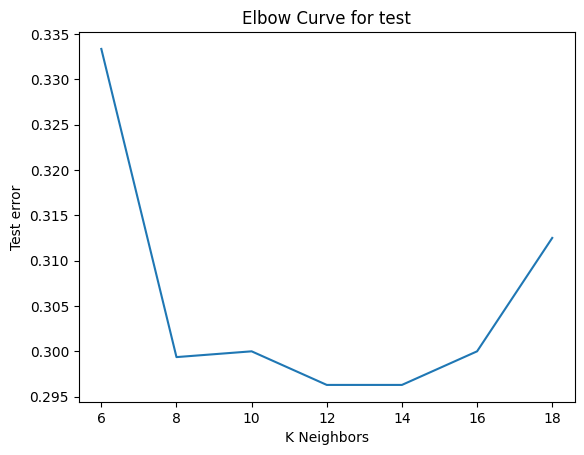

In [ ]:
# plotting the Curves
plt.plot(range(6, 20, 2), test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7037037037037037


# KNN Regression

### Importing the data

In [ ]:
data = pd.read_csv('train_cleaned.csv')
data = data[:2000]
data.shape

(2000, 46)

In [ ]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((2000, 45), (2000,))

### Scaling the data (Using MinMax Scaler)

In [ ]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled)

<img src="Image 1.png"  style="width:600px;" align="center">

In [ ]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [ ]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse, r2_score

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     2233215.547684643


### Elbow for Regressor

In [ ]:
def Elbow():
  #initiating empty list
    test_mse = []

  #training model for evey value of K
    for i in range(1, 100):
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)

    return test_mse

In [ ]:
# calling above defined function
test = Elbow()
test

[2741991.8711005095,
 2380505.498032754,
 2238277.012150114,
 2174910.968705197,
 2233215.547684643,
 2131143.378547532,
 2027870.1043731922,
 2000926.7039253092,
 1954266.4812285947,
 1880689.4967870952,
 1869855.076034793,
 1836806.2877154422,
 1815342.1613017418,
 1779463.4854354365,
 1762152.861794556,
 1743487.2473437486,
 1720092.971751496,
 1702901.839702916,
 1689898.616352934,
 1676541.706958027,
 1654593.3403621882,
 1624015.7397087475,
 1614732.3253021108,
 1605938.0888857837,
 1600070.7982315654,
 1593535.8803541588,
 1584133.724802834,
 1583520.4225719671,
 1569365.8735190441,
 1571185.46294784,
 1567560.5880529818,
 1567089.34313893,
 1568226.4824777725,
 1565282.9238043719,
 1571051.2839811828,
 1578857.9194668953,
 1585041.7368886871,
 1585091.9316267618,
 1591201.0669880519,
 1598316.3419786927,
 1608868.301513987,
 1616385.8731327911,
 1624836.8433528917,
 1633744.8789832946,
 1641413.4221231637,
 1651288.045462709,
 1664171.713223568,
 1673892.982773331,
 1683782.891

Text(0.5, 1.0, 'Elbow Curve for test')

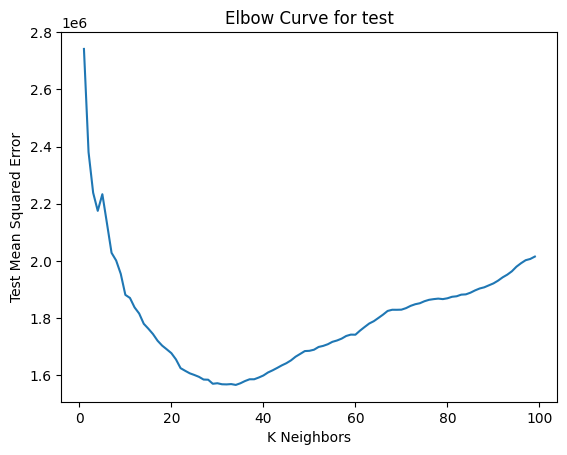

In [ ]:
# plotting the Curves
plt.plot(range(1, 100), test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 30)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test RMSE    ', k )

Test RMSE     1253.4693705662855


In [ ]:
k = r2_score(test_predict, test_y)
print('Test R2 Score    ', k )

Test R2 Score     -0.2479400225345436
